# GCU_CS

## Members:
* Gabriel Aracena
    * Senior @ Grand Canyon University 
    * Expected Graduation April 2024
    * Pursuing a Bachelor's of Science in Computer Science with an Emphasis on Big Data 
    * Originally from Fortaleza, Brazil
    * Hobbies: Playing Intramural Sports, Playing Video Games, Working Out
    * LinkedIn: Gabriel Aracena (https://www.linkedin.com/in/gabriel-aracena-a92363195/)
    * GitHub: G4BE-334 (https://github.com/G4BE-334)
    * Personality traits: Dedicated, Outgoing, Friendly, Analytical, Driven

![Gabriel Profile Picture](src/pictures/gabriel.jpg)

* Kyungchan Im (aka Chris)
    * Senior @ Grand Canyon University 
    * Expected Graduation April 2024
    * Pursuing a Bachelor's of Science in Computer Science with an Emphasis on Big Data 
    * Originally from Seoul, South Korea
    * Hobbies: Playing Basketball, Coding, Learning about AI
    * LinkedIn: Kyungchan (Chris) Im (https://www.linkedin.com/in/kyungchan-im/)
    * GitHub: ChristheIm (https://github.com/ChristheIm)
    * Personality traits: Outgoing, Diligent, Hard-working, Passionate, Humorous

![Chris Profile Picture](src/pictures/chris.jfif)



---

# Data Anaysis of Disaster and Claims for State Farm Coding Competition 2023 Finals

## Preparation

In [110]:
## Import libraries
from simple_data_tool import SimpleDataTool

# For Data Analysis
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point


ModuleNotFoundError: No module named 'geopandas'

### Data Load
Import JSON dataset into DataFrame in order to work with Python Packages

In [ ]:
# Load Agent JSON data
agents = pd.read_json("data/sfcc_2023_agents.json")
agents.set_index('id', inplace=True) # Set the 'id' column as the index
df_agents = pd.json_normalize(agents.to_dict(orient='records')) # Normalize the columns

# Load Claim JSON data
claims = pd.read_json("data/sfcc_2023_claims.json")
claims.set_index('id', inplace=True) # Set the 'id' column as the index
df_claims = pd.json_normalize(claims.to_dict(orient='records')) # Normalize the columns

# Load Claim Handler JSON data
claim_handlers = pd.read_json("data/sfcc_2023_claim_handlers.json")
claim_handlers.set_index('id', inplace=True) # Set the 'id' column as the index
df_claim_handlers = pd.json_normalize(claim_handlers.to_dict(orient='records')) # Normalize the columns

# Load Disaster JSON data
disasters = pd.read_json("data/sfcc_2023_disasters.json")
disasters.set_index('id', inplace=True) # Set the 'id' column as the index
df_disasters = pd.json_normalize(disasters.to_dict(orient='records')) # Normalize the columns

### Check the info for each individual dataset

1) Get Data information and description about the data <br>
2) Normalization and Data preprocessing

In [ ]:
agents.count() 

first_name            100
last_name             100
state                 100
region                100
primary_language      100
secondary_language     59
years_active          100
dtype: int64

In [ ]:
agents.head()

,first_name,last_name,state,region,primary_language,secondary_language,years_active
id,,,,,,,
1,Catha,Abrahmer,Minnesota,Midwest,English,German,10
2,Yetta,Eason,Oregon,West,English,Korean,12
3,Janeta,D'Avaux,Connecticut,Northeast,English,None,47
4,Kalie,Tomkins,Virginia,South,English,None,33
5,Teddy,Dennitts,Illinois,Midwest,English,Chinese,48


In [ ]:
claims.count() # count the number of each columns and missing values.

disaster_id                  1000
status                       1000
total_loss                   1000
loss_of_life                 1000
type                         1000
severity_rating              1000
estimate_cost                1000
agent_assigned_id            1000
claim_handler_assigned_id    1000
dtype: int64

In [ ]:
claims.head()

,disaster_id,status,total_loss,loss_of_life,type,severity_rating,estimate_cost,agent_assigned_id,claim_handler_assigned_id
id,,,,,,,,,
1,15,Received,False,False,Auto,4,3580.02,97,50
2,24,In Review,False,False,Auto,6,1741.32,36,92
3,31,Received,True,False,Auto,4,15224.30,94,133
4,14,Received,False,True,Auto,8,6542.46,92,39
5,30,Closed,False,False,Auto,1,979.81,86,103


In [ ]:
claim_handlers.count() # count the number of each columns and missing values.

first_name    156
last_name     156
dtype: int64

In [ ]:
claim_handlers.head()

,first_name,last_name
id,,
1,Barnabe,Clynman
2,Valdemar,Size
3,Edithe,Bleakley
4,Sonja,Diamant
5,Elsey,Sreenan


In [ ]:
disasters.count() # count the number of each columns and missing values.

type             100
state            100
name             100
description      100
start_date       100
end_date         100
declared_date    100
lat              100
long             100
radius_miles     100
dtype: int64

In [ ]:
disasters.head()

,type,state,name,description,start_date,end_date,declared_date,lat,long,radius_miles
id,,,,,,,,,,
1,Flood,Alaska,Alaska Flood,Fusce consequat. Nulla nisl. Nunc nisl.\n\nDui...,2023-06-13,2023-06-20,2023-06-17,58.3271,-134.4742,168
2,Wildfire,Texas,Texas Wildfire,Duis consequat dui nec nisi volutpat eleifend....,2023-04-11,2023-04-19,2023-04-12,33.5693,-101.8904,235
3,Tornado,Virginia,Virginia Tornado,Nullam sit amet turpis elementum ligula vehicu...,2023-04-29,2023-05-07,2023-05-06,38.9776,-77.3860,273
4,Earthquake,Connecticut,Connecticut Earthquake,Fusce consequat. Nulla nisl. Nunc nisl.,2023-04-24,2023-05-09,2023-04-28,41.3657,-72.9275,120
5,Winter Storm,Missouri,Missouri Winter Storm,Suspendisse potenti. In eleifend quam a odio. ...,2023-03-11,2023-03-21,2023-03-14,39.0663,-94.5674,155


---

### Find some insight from the dataset

In [ ]:
# Create a SimpleDataTool object for use calculation functions inside the class
data = SimpleDataTool()

##### Find Regional Disaster Counts #####

In [ ]:
# Get the total number of disaster occurrend in the simulation
regional_disaster_map = data.get_regional_disaster_map()

In [ ]:
# Initialize lists to store the data
disaster_regions = []
disaster_types = []
disaster_counts = []

# Populate the lists with data
for region, disaster in regional_disaster_map.items():
    for disaster_type, count in disaster.items():
        disaster_regions.append(region)
        disaster_types.append(disaster_type)
        disaster_counts.append(count)

# Create a DataFrame
disaster_map = pd.DataFrame({
    'Region': disaster_regions,
    'Disaster Type': disaster_types,
    'Count': disaster_counts
})

# Print the sum of the disaster regionally.
print(disaster_map.groupby(['Region']).sum().sort_values(by='Count', ascending=False))

                                               Disaster Type  Count
Region                                                             
south      WildfireTornadoEarthquakeLandslideHurricaneFlo...     36
midwest    Winter StormWildfireEarthquakeThunderstormFloo...     25
northeast  EarthquakeThunderstormFloodLandslideHurricaneW...     20
west       FloodTornadoThunderstormWildfireWinter StormHu...     19


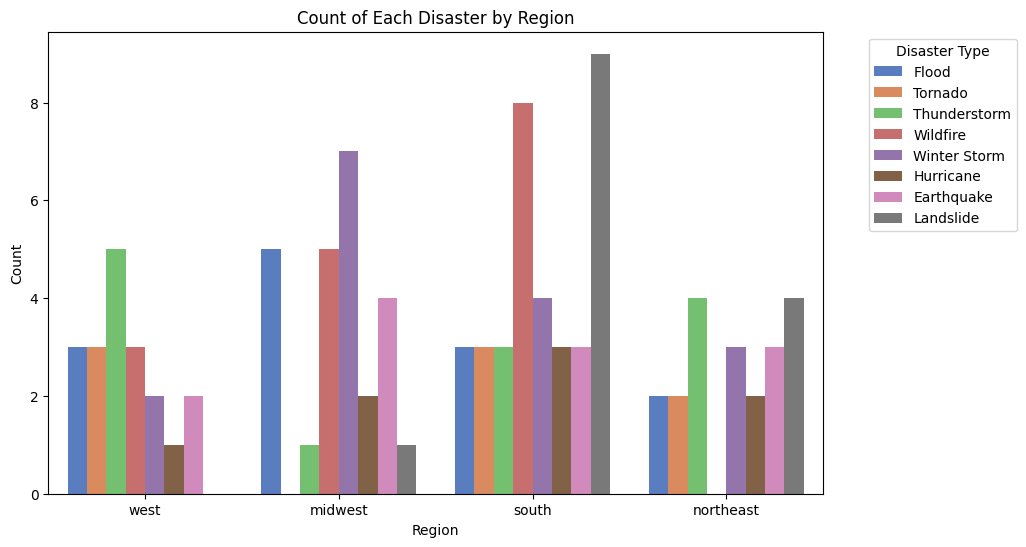

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Count', hue='Disaster Type', data=disaster_map, errorbar=None, palette='muted')
plt.title('Count of Each Disaster by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Find the number of claims by region #####

In [ ]:
regional_claim_map = data.get_total_claims_per_regional_disaster()

In [ ]:
# Initialize lists to store the data
claim_map_regions = []
claim_map_state = []
claim_map_counts = []

# Populate the lists with data
for region, state in regional_claim_map.items():
    for state_name, count in state.items():
        claim_map_regions.append(region)
        claim_map_state.append(state_name)
        claim_map_counts.append(count)

# Create a DataFrame
claim_map = pd.DataFrame({
    'Region': claim_map_regions,
    'Disaster Type': claim_map_state,
    'Count': claim_map_counts
})


# Print the sum of the disaster regionally.
total_claim_map = claim_map.groupby(['Region']).sum().sort_values(by='Count', ascending=False)
print(total_claim_map)

                                               Disaster Type  Count
Region                                                             
south      North CarolinaFloridaMississippiTexasGeorgiaVi...    328
midwest    MichiganMinnesotaNebraskaIowaKansasIndianaOhio...    240
west       CaliforniaArizonaWashingtonUtahIdahoColoradoAl...    224
northeast  New YorkConnecticutPennsylvaniaDistrict of Col...    208


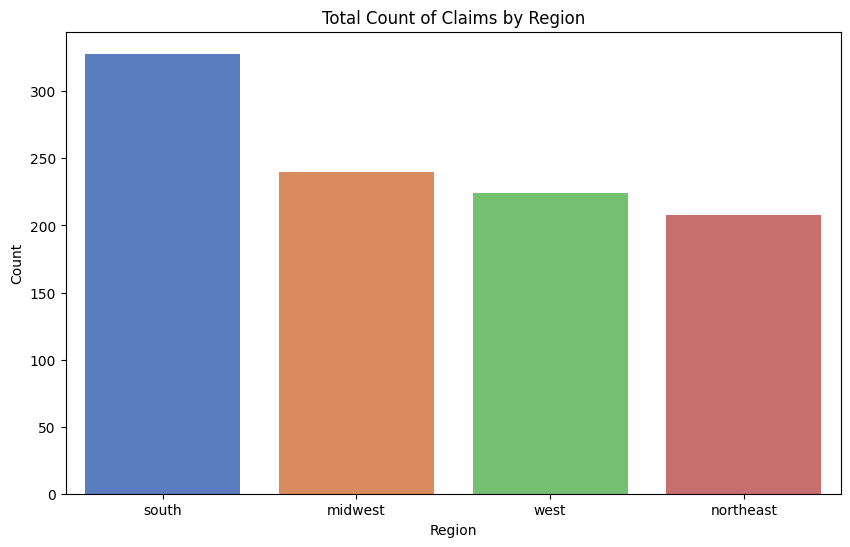

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Count', data=total_claim_map, legend=False, palette='muted', hue='Region')

plt.title('Total Count of Claims by Region')
plt.ylabel('Count')
plt.xlabel('Region')

plt.show()

---

### Agent and Claims per region analysis

We want to analyse the number of agents and claims per region to see if there is a relationship between them. Ideally, it is expected that a region with a higher number of claims would have a higher number of agents to deal with them and the contrary as well. 

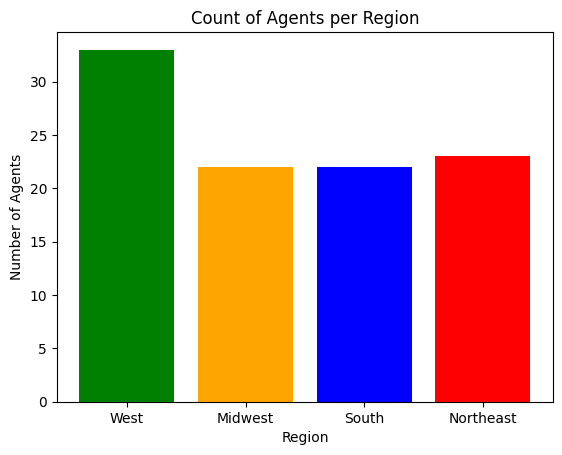

In [ ]:
## Finding the number of Agents per region

regional_agents = data.get_total_agents_per_region()

regions = list(regional_agents.keys())
agent_counts = [len(agents) for agents in regional_agents.values()]


colors = ['green', 'orange', 'blue', 'red']

# Create a bar chart with different colors
plt.bar(regions, agent_counts, color=colors)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Agents')
plt.title('Count of Agents per Region')

# Show the plot
plt.show()

As we can already start to see, there seems to be a discrepancy between the number of agents per claim on each region. The south region it is expected to have the most amount of agents but the west region is the one that actually has it.

Let's dive deeper into that and see a normalized comparison between them

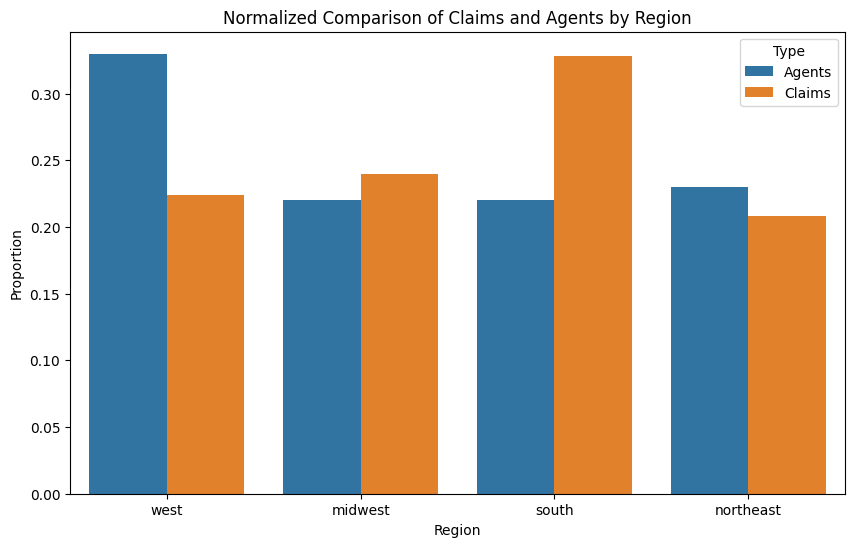

In [ ]:
# Convert agents data to a DataFrame
agents_data = pd.DataFrame({
    'Region': [region.lower() for region in regional_agents.keys()],
    'Agents': [len(agents) for agents in regional_agents.values()],
    'Type': 'Agents'
})

# Convert claim data to a DataFrame and add a 'Type' column
claims_data = total_claim_map.reset_index()
claims_data['Type'] = 'Claims'

# Rename columns for consistency
claims_data.rename(columns={'Count': 'Claims'}, inplace=True)

# Combine the data
combined_data = pd.concat([agents_data, claims_data], ignore_index=True)

# Calculate total number of agents and claims
total_agents = agents_data['Agents'].sum()
total_claims = claims_data['Claims'].sum()

# Normalize the data by converting counts to proportions
agents_data['Agents'] = agents_data['Agents'] / total_agents
claims_data['Claims'] = claims_data['Claims'] / total_claims

# Combine the normalized data
combined_normalized_data = pd.concat([agents_data, claims_data], ignore_index=True)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot using the normalized data
sns.barplot(x='Region', y='value', hue='Type', data=pd.melt(combined_normalized_data, ['Region', 'Type']))

# Add titles and labels
plt.title('Normalized Comparison of Claims and Agents by Region')
plt.ylabel('Proportion')
plt.xlabel('Region')

# Show the plot
plt.show()

As we can see on the normalized graph above, there is a big issue that needs to be mitigated on our State Farm agency. Some balancing needs to be done to ensure effectiveness by our agents and each individual branch as well as fairness. We don't want a branch to be left out with way less agents than needed. 

Lastly

In [ ]:
claims_data['Region'] = claims_data['Region'].str.lower()

# Set 'Region' as index for easy division
agents_data.set_index('Region', inplace=True)
claims_data.set_index('Region', inplace=True)

# Calculate the ratio of agents to claims
agents_per_claims_ratio = agents_data['Agents'] / claims_data['Claims']

# Reset index to bring 'Region' back as a column
agents_per_claims_ratio = agents_per_claims_ratio.reset_index()

# Rename the columns for clarity
agents_per_claims_ratio.columns = ['Region', 'Agents per Claim']

# Print the result
print(agents_per_claims_ratio)

      Region  Agents per Claim
0    midwest          0.916667
1  northeast          1.105769
2      south          0.670732
3       west          1.473214


### Geographical Disaster Map

- By using Geographical shapefile, we can plot specific points within the map.
- shapefile resources are from ScienceBase.gov portal (https://www.sciencebase.gov/catalog/item/4f4e4783e4b07f02db4837ce)

In [ ]:
# Group by 'lat' and 'long' and count the occurrences
location_counts = disasters.groupby(['lat', 'long']).size().reset_index(name='counts')

# Merge the counts back into the original DataFrame
disasters = disasters.merge(location_counts, on=['lat', 'long'])

# Normalize the counts for plotting purposes
# This will scale the counts to a range suitable for the markersize or alpha
max_count = disasters['counts'].max()
disasters['normalized_counts'] = disasters['counts'] / max_count

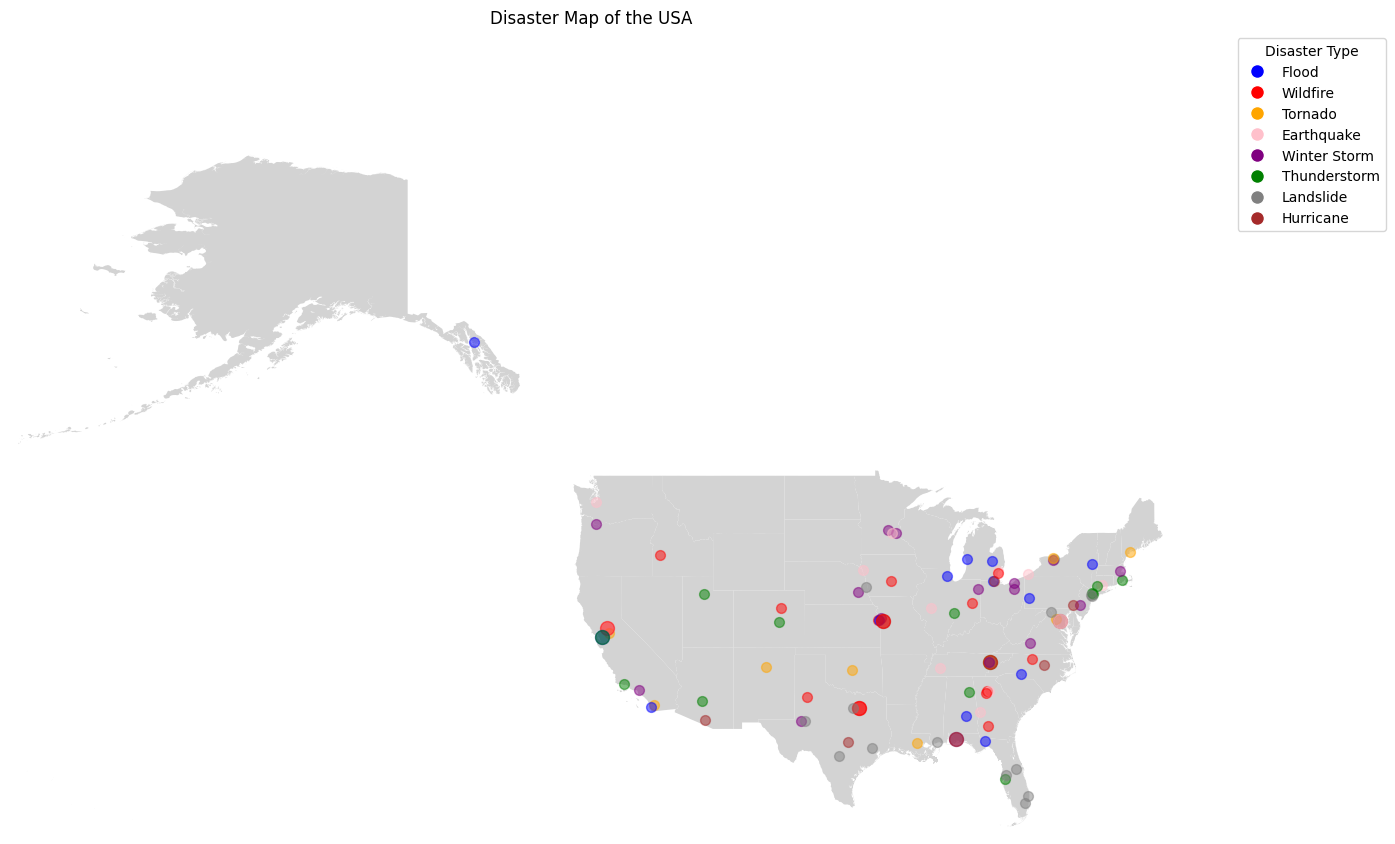

In [ ]:
# Load the shapefile
us_states = gpd.read_file('data/map/US_States.shp')

# Convert the disaster data into GeoDataFrame
gdf = gpd.GeoDataFrame(disasters, geometry=gpd.points_from_xy(disasters['long'], disasters['lat']))

# Plot the states
fig, ax = plt.subplots(figsize=(15, 15))
us_states.plot(ax=ax, color='lightgrey')

# Plot each disaster point with a different color based on the type of disaster
disaster_types = gdf['type'].unique()
colors = ['blue', 'red', 'orange', 'pink', 'purple', 'green', 'grey', 'brown']  # Define more colors if you have more types
color_dict = dict(zip(disaster_types, colors))

# Iterate through the disaster types and plot them
for idx, row in gdf.iterrows():
    ax.scatter(row['geometry'].x, row['geometry'].y, s = 100 * row['normalized_counts'],  # scale size by normalized count
               color=color_dict[row['type']], alpha=0.5)  # scale alpha by normalized count


# Set the x and y axis limits to fit the contiguous US
ax.set_xlim(-180, -66)
ax.set_ylim(24, 80)
ax.set_title('Disaster Map of the USA')

# Create a legend for the disaster types
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=disaster_type,
                              markerfacecolor=color, markersize=10)
                   for disaster_type, color in color_dict.items()]
ax.legend(handles=legend_elements, title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Remove the x and y axis since they often aren't useful in a geographical plot
ax.set_axis_off()

# Show the plot
plt.show()


---

### Now we want to see the heatmap of total claims distribution per state.

In [ ]:
# Get the total number of disaster occurrend in individual region/states
total_claim_per_state = data.get_total_claims_per_regional_disaster()

# Separte the data into two lists for plotting
claims_list = [(state, claims) for region, states in total_claim_per_state.items() for state, claims in states.items()]
claims_per_state_table = pd.DataFrame(claims_list, columns=['state', 'claims'])

In [ ]:
claims_per_state_table.sort_values(by='claims', ascending=False, inplace=True)
claims_per_state_table

,state,claims
0,California,100
20,Texas,89
27,New York,86
18,Florida,67
14,Ohio,52
29,Pennsylvania,44
8,Michigan,40
25,Tennessee,39
21,Georgia,32
13,Indiana,32


In [ ]:
us_states.head()

,STFIPS,STATE,STPOSTAL,VERSION,DotRegion,Shape_Leng,Shape_Area,geometry
0,02,Alaska,AK,05,10,1033.192917,278.612681,"MULTIPOLYGON (((-148.62042 60.90747, -148.6182..."
1,30,Montana,MT,05,8,36.656062,45.078808,"POLYGON ((-104.05770 44.99743, -104.05954 44.9..."
2,16,Idaho,ID,05,10,31.141332,24.456703,"POLYGON ((-117.12337 44.60405, -117.12187 44.6..."
3,38,North Dakota,ND,05,8,25.154998,21.839700,"POLYGON ((-96.78089 46.61976, -96.78022 46.619..."
4,27,Minnesota,MN,05,5,36.513438,25.535173,"MULTIPOLYGON (((-92.20109 46.70614, -92.20159 ..."


In [ ]:
# Merge the claims data with the shapefile to get the geometry
heatmap_gdf = us_states.merge(claims_per_state_table, left_on='STATE', right_on='state')
heatmap_gdf['claims'].fillna(0, inplace=True)

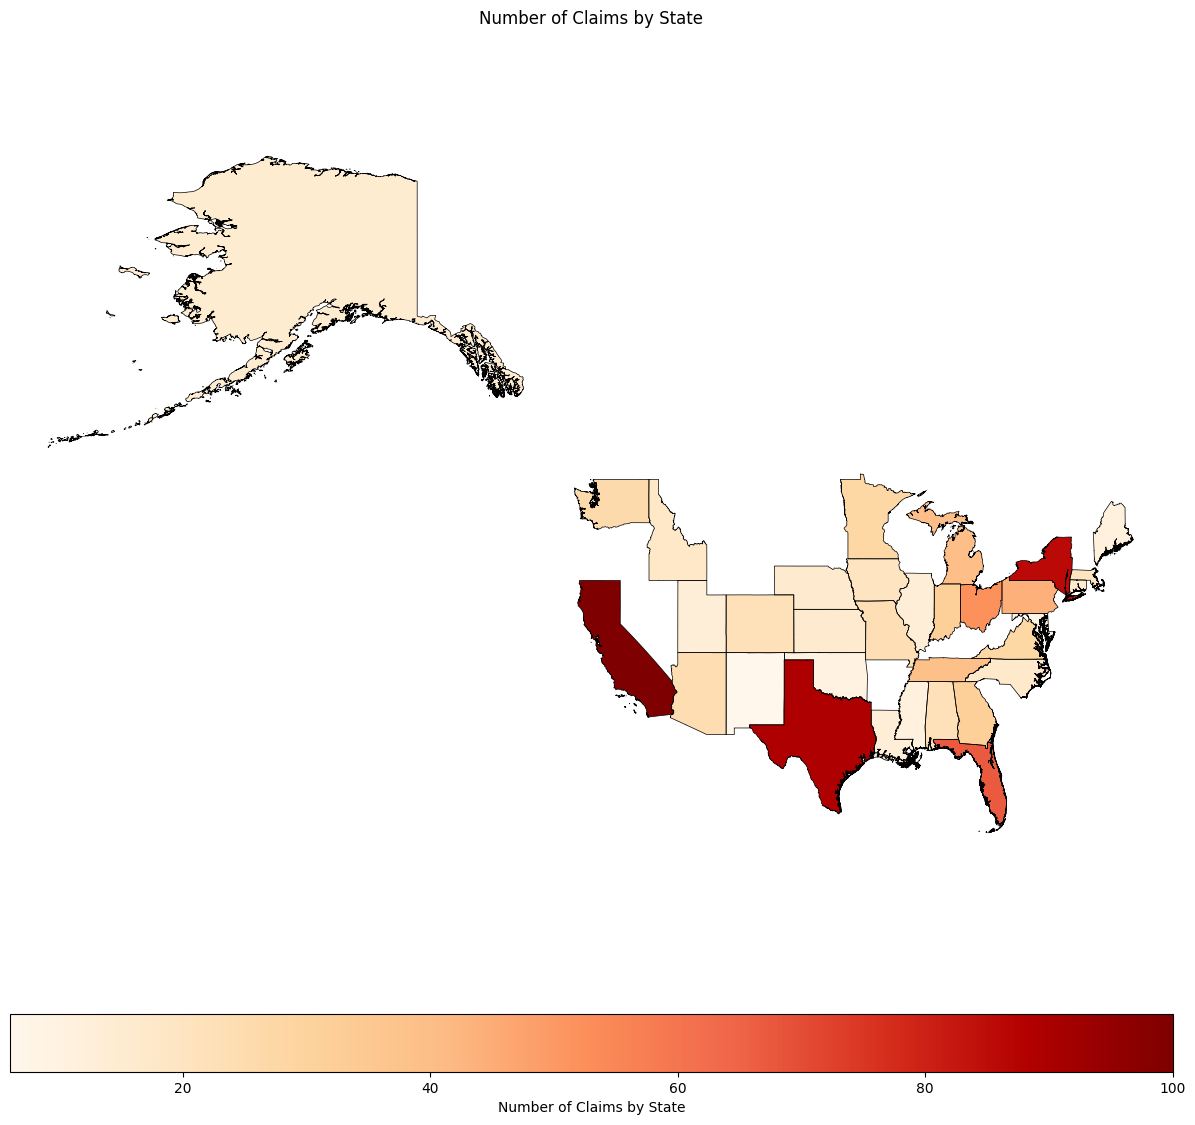

In [ ]:
# Heatmap Definition
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
heatmap_gdf.plot(column='claims', ax=ax, cmap='OrRd', legend=True,
                legend_kwds={'label': "Number of Claims by State",
                             'orientation': "horizontal"})

# Plot state borders on top of the heatmap
heatmap_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=0.5)  # Adjust linewidth as needed


# Remove the axis for a cleaner look
ax.set_axis_off()

# Set a title for the map
ax.set_title('Number of Claims by State')

# Set figure size
ax.set_xlim(-180, -66)
ax.set_ylim(24, 80)

# Show the plot
plt.show()

---

### Severity and Estimated Cost Analaisys

We also want to analyse how severity and other variables such as total loss, life loss and claim type affect the estimated cost. In the end, state farm is a business and we want to be able to analyse our margins and cost to maintain profitability, also enabling us to find possible outliers that needs further investigation. 

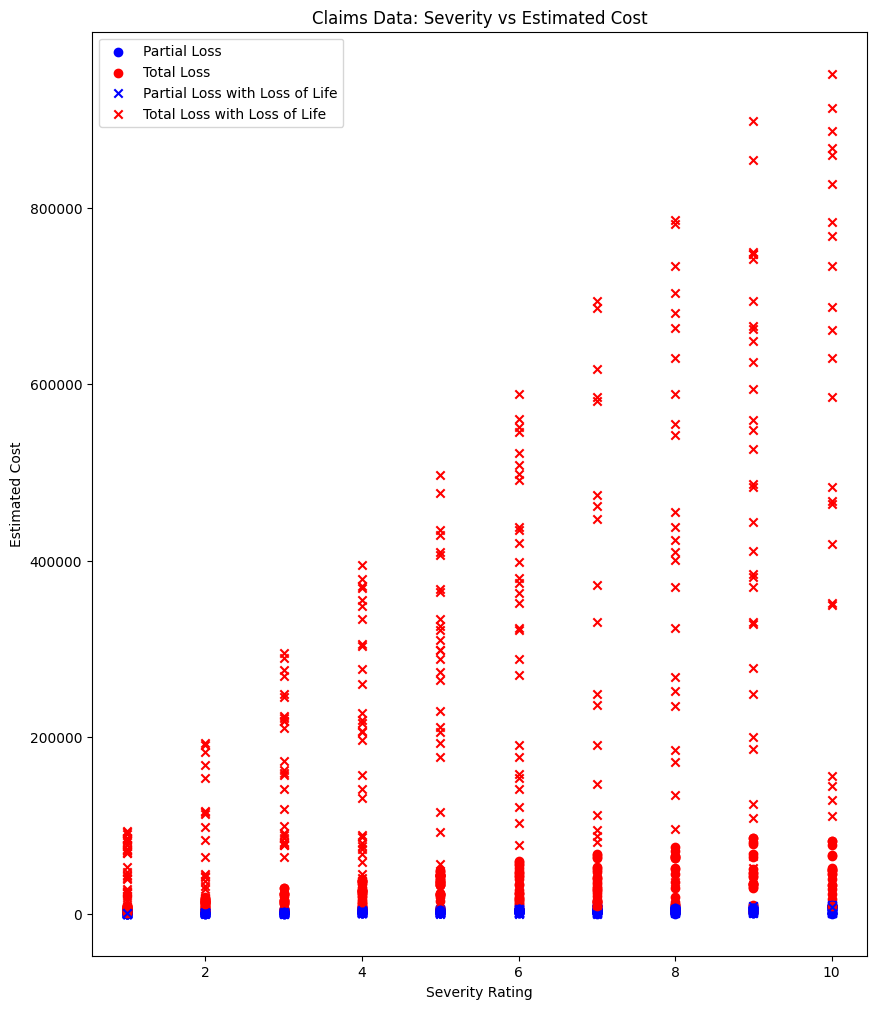

In [ ]:
claims_df = pd.DataFrame(data.get_claim_data())

plt.figure(figsize=(10, 12))
ax = plt.gca()

# Create a legend dictionary to handle legend entries
legend_labels = {}

# Iterate through the DataFrame and plot each point with appropriate color and marker
for index, row in claims_df.iterrows():
    color = 'red' if row['total_loss'] else 'blue'
    marker = 'x' if row['loss_of_life'] else 'o'
    label = ('Total Loss' if row['total_loss'] else 'Partial Loss') + (' with Loss of Life' if row['loss_of_life'] else '')
    
    # Add to legend_labels if not already present
    if label not in legend_labels:
        legend_labels[label] = plt.scatter([], [], color=color, marker=marker)

    # Plot each point
    plt.scatter(row['severity_rating'], row['estimate_cost'], color=color, marker=marker)

# Add the legend to the plot with the unique handles and labels
plt.legend(legend_labels.values(), legend_labels.keys())

# Add labels and title
plt.xlabel('Severity Rating')
plt.ylabel('Estimated Cost')
plt.title('Claims Data: Severity vs Estimated Cost')

# Show the plot
plt.show()

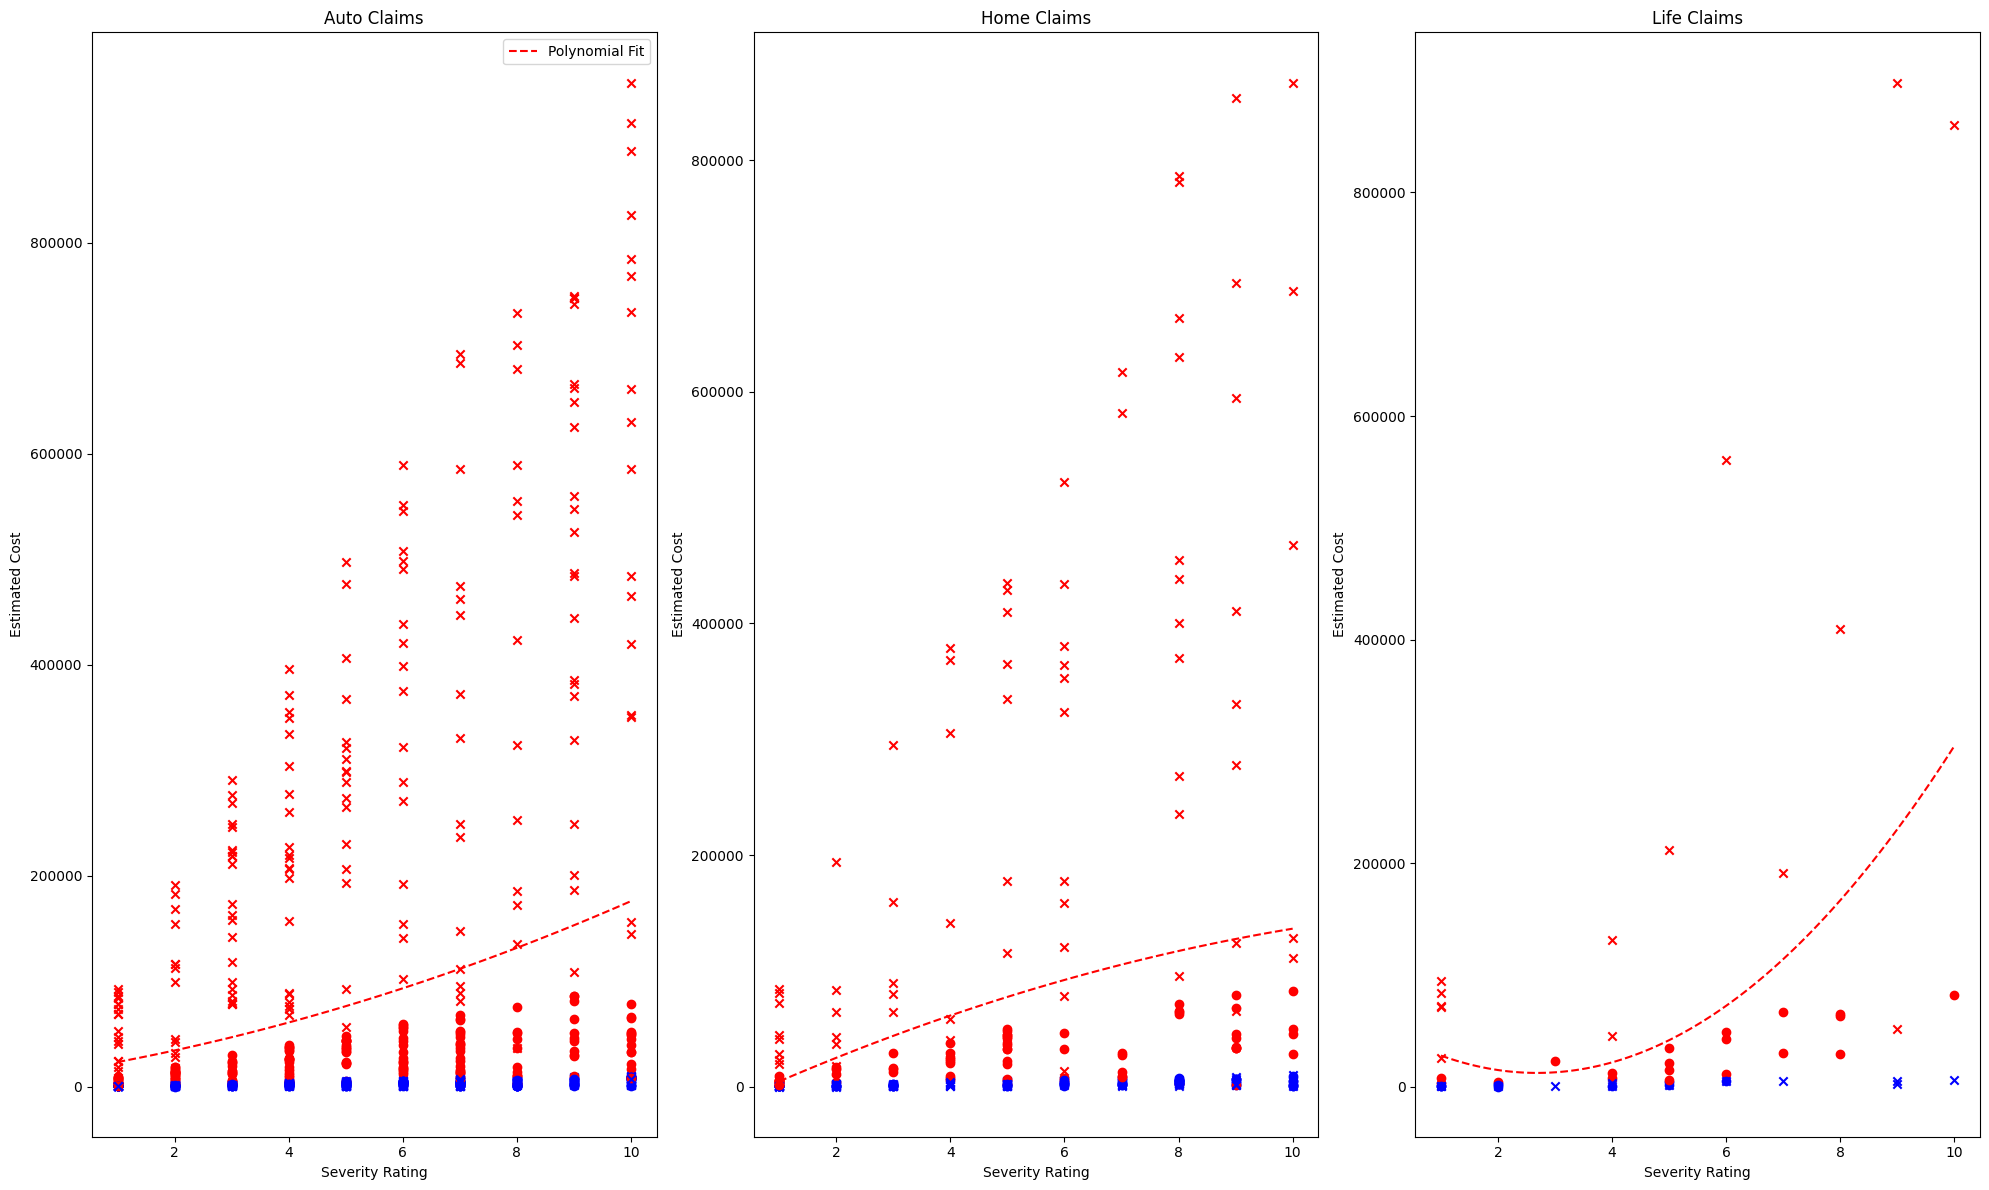

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Defining type of claims
claim_types = ['Auto', 'Home', 'Life']

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 12))  # 1 row, 3 columns

# Loop through the claim types and create a subplot for each
for i, claim_type in enumerate(claim_types):
    # Filter the DataFrame for the current claim type
    df_filtered = claims_df[claims_df['type'] == claim_type]

    # Prepare data for polynomial fit
    xdata = df_filtered['severity_rating']
    ydata = df_filtered['estimate_cost']
    
    # Fit a Polynomial (degree can be adjusted)
    degree = 2  # Degree of the polynomial
    coefs = Polynomial.fit(xdata, ydata, degree).convert().coef

    # Plotting the polynomial fit line
    x_fit = np.linspace(min(xdata), max(xdata), 100)
    y_fit = sum(coefs[j] * x_fit**j for j in range(len(coefs)))
    axes[i].plot(x_fit, y_fit, "r--", label='Polynomial Fit')

    # Iterate through the filtered DataFrame and plot each point with the appropriate color and marker
    for index, row in df_filtered.iterrows():
        color = 'red' if row['total_loss'] else 'blue'
        marker = 'x' if row['loss_of_life'] else 'o'
        axes[i].scatter(row['severity_rating'], row['estimate_cost'], color=color, marker=marker)

    # Add titles and labels to each subplot
    axes[i].set_title(f'{claim_type} Claims')
    axes[i].set_xlabel('Severity Rating')
    axes[i].set_ylabel('Estimated Cost')

    # Only add legend to the first subplot for clarity
    if i == 0:
        handles, labels = axes[i].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i].legend(by_label.values(), by_label.keys())

# Adjust the layout so labels and titles don't overlap
plt.tight_layout()

# Show the plot
plt.show()